In [46]:
from typing import List, Tuple
import math

Vector = List[float]

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero
    

def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [47]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta


In [21]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

In [22]:
x

[-100,
 -90,
 -80,
 -70,
 -60,
 -50,
 -40,
 -30,
 -20,
 -10,
 0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100]

In [23]:
y

[-305,
 -275,
 -245,
 -215,
 -185,
 -155,
 -125,
 -95,
 -65,
 -35,
 -5,
 25,
 55,
 85,
 115,
 145,
 175,
 205,
 235,
 265,
 295]

In [24]:
least_squares_fit(x, y)

(-5.0, 3.0)

In [25]:
def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [26]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [27]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)

In [28]:
alpha

22.94755241346903

In [29]:
beta

0.903865945605865

In [32]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

31.98621186952768

In [33]:
predict(alpha, beta, 10)

31.98621186952768

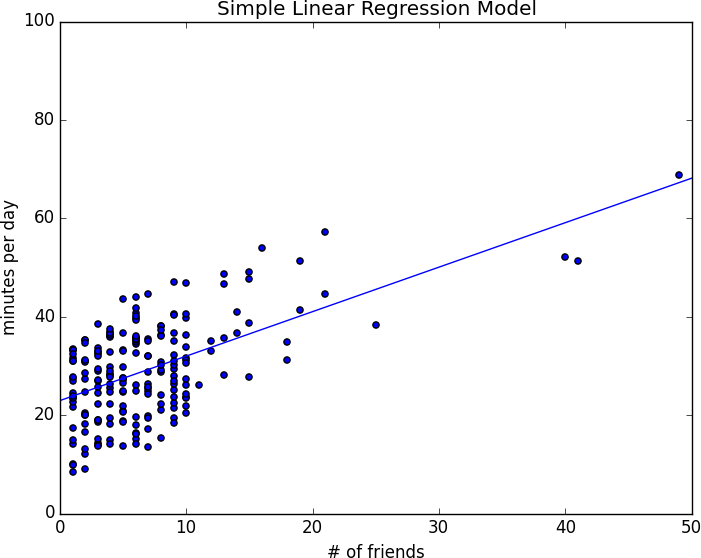

In [44]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

assert magnitude([3, 4]) == 5

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

In [48]:
import random
import tqdm

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]  # choose random value to start

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # Partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                     for x_i, y_i in zip(num_friends_good,
                                         daily_minutes_good))

        # Partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                     for x_i, y_i in zip(num_friends_good,
                                         daily_minutes_good))

        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta,
                               num_friends_good, daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")

        # Finally, update the guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

loss: 13196.619: 100%|██████████| 10000/10000 [00:09<00:00, 1077.46it/s]


In [41]:
alpha

22.94755215486918

In [42]:
beta

0.9038659663142796

In [43]:
guess

[22.947552155340915, 0.9038659662765034]